# Employee job continuosly Prediction

# Classification Algorithm Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv(r"Employee.csv")
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017.0,Bangalore,3,34.0,Male,No,0,0
1,Bachelors,2013.0,Pune,1,28.0,Female,No,3,1
2,Bachelors,2014.0,New Delhi,3,38.0,Female,No,2,0
3,Masters,2016.0,Bangalore,3,27.0,Male,No,5,1
4,Masters,2017.0,Pune,3,24.0,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013.0,Bangalore,3,26.0,Female,No,4,0
4649,Masters,2013.0,Pune,2,37.0,Male,No,2,1
4650,Masters,2018.0,New Delhi,3,27.0,Male,No,5,1
4651,Bachelors,2012.0,Bangalore,3,30.0,Male,Yes,2,0


In [3]:
df.shape

(4653, 9)

In [4]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017.0,Bangalore,3,34.0,Male,No,0,0
1,Bachelors,2013.0,Pune,1,28.0,Female,No,3,1
2,Bachelors,2014.0,New Delhi,3,38.0,Female,No,2,0
3,Masters,2016.0,Bangalore,3,27.0,Male,No,5,1
4,Masters,2017.0,Pune,3,24.0,Male,Yes,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  4653 non-null   object 
 1   JoiningYear                4636 non-null   float64
 2   City                       4653 non-null   object 
 3   PaymentTier                4653 non-null   int64  
 4   Age                        4633 non-null   float64
 5   Gender                     4646 non-null   object 
 6   EverBenched                4653 non-null   object 
 7   ExperienceInCurrentDomain  4653 non-null   int64  
 8   LeaveOrNot                 4653 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 327.3+ KB


In [6]:
df.keys()

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [7]:
df.isnull().sum()

Education                     0
JoiningYear                  17
City                          0
PaymentTier                   0
Age                          20
Gender                        7
EverBenched                   0
ExperienceInCurrentDomain     0
LeaveOrNot                    0
dtype: int64

In [8]:
df.Education.value_counts()

Education
Bachelors    3601
Masters       873
PHD           179
Name: count, dtype: int64

In [9]:
df.City.value_counts()

City
Bangalore    2228
Pune         1268
New Delhi    1157
Name: count, dtype: int64

In [10]:
df.Gender.value_counts()

Gender
Male      2774
Female    1872
Name: count, dtype: int64

# Heat-Map

<Axes: >

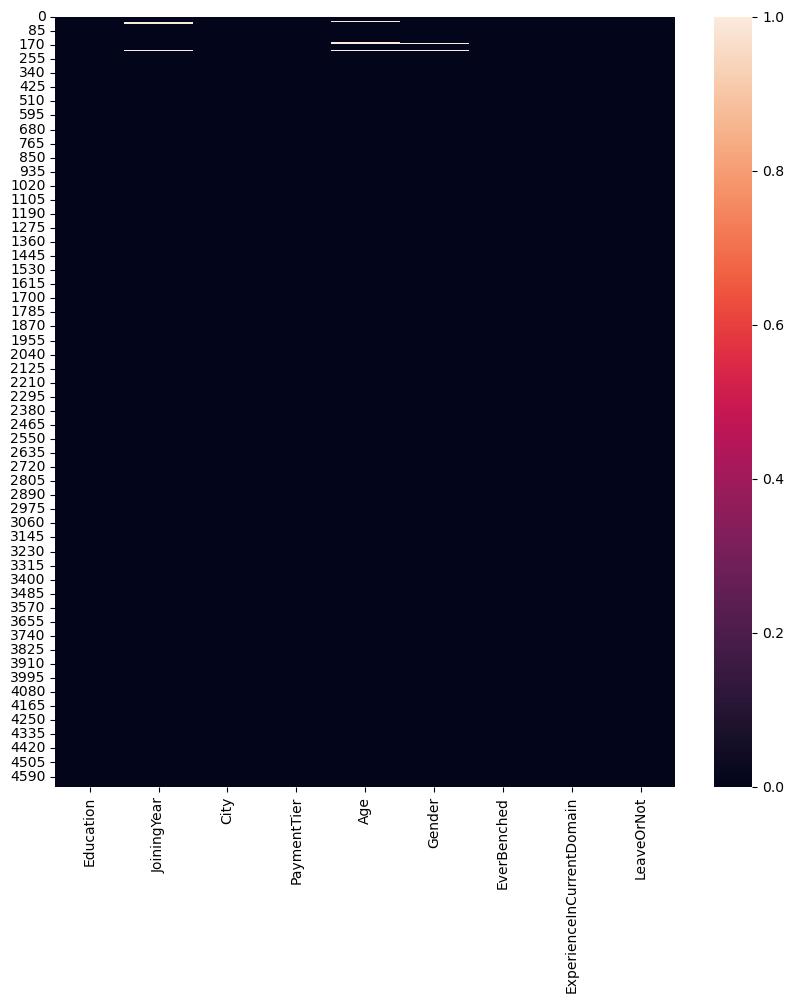

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [12]:
null_var=df.isnull().sum()/df.shape[0]*100
null_var

Education                    0.000000
JoiningYear                  0.365356
City                         0.000000
PaymentTier                  0.000000
Age                          0.429830
Gender                       0.150441
EverBenched                  0.000000
ExperienceInCurrentDomain    0.000000
LeaveOrNot                   0.000000
dtype: float64

# Applying Mean and median 

In [13]:
df1=df.select_dtypes(include=['int64','float64'])
df1.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
0,2017.0,3,34.0,0,0
1,2013.0,1,28.0,3,1
2,2014.0,3,38.0,2,0
3,2016.0,3,27.0,5,1
4,2017.0,3,24.0,2,1


In [14]:
df1.isnull().sum()

JoiningYear                  17
PaymentTier                   0
Age                          20
ExperienceInCurrentDomain     0
LeaveOrNot                    0
dtype: int64

<Axes: >

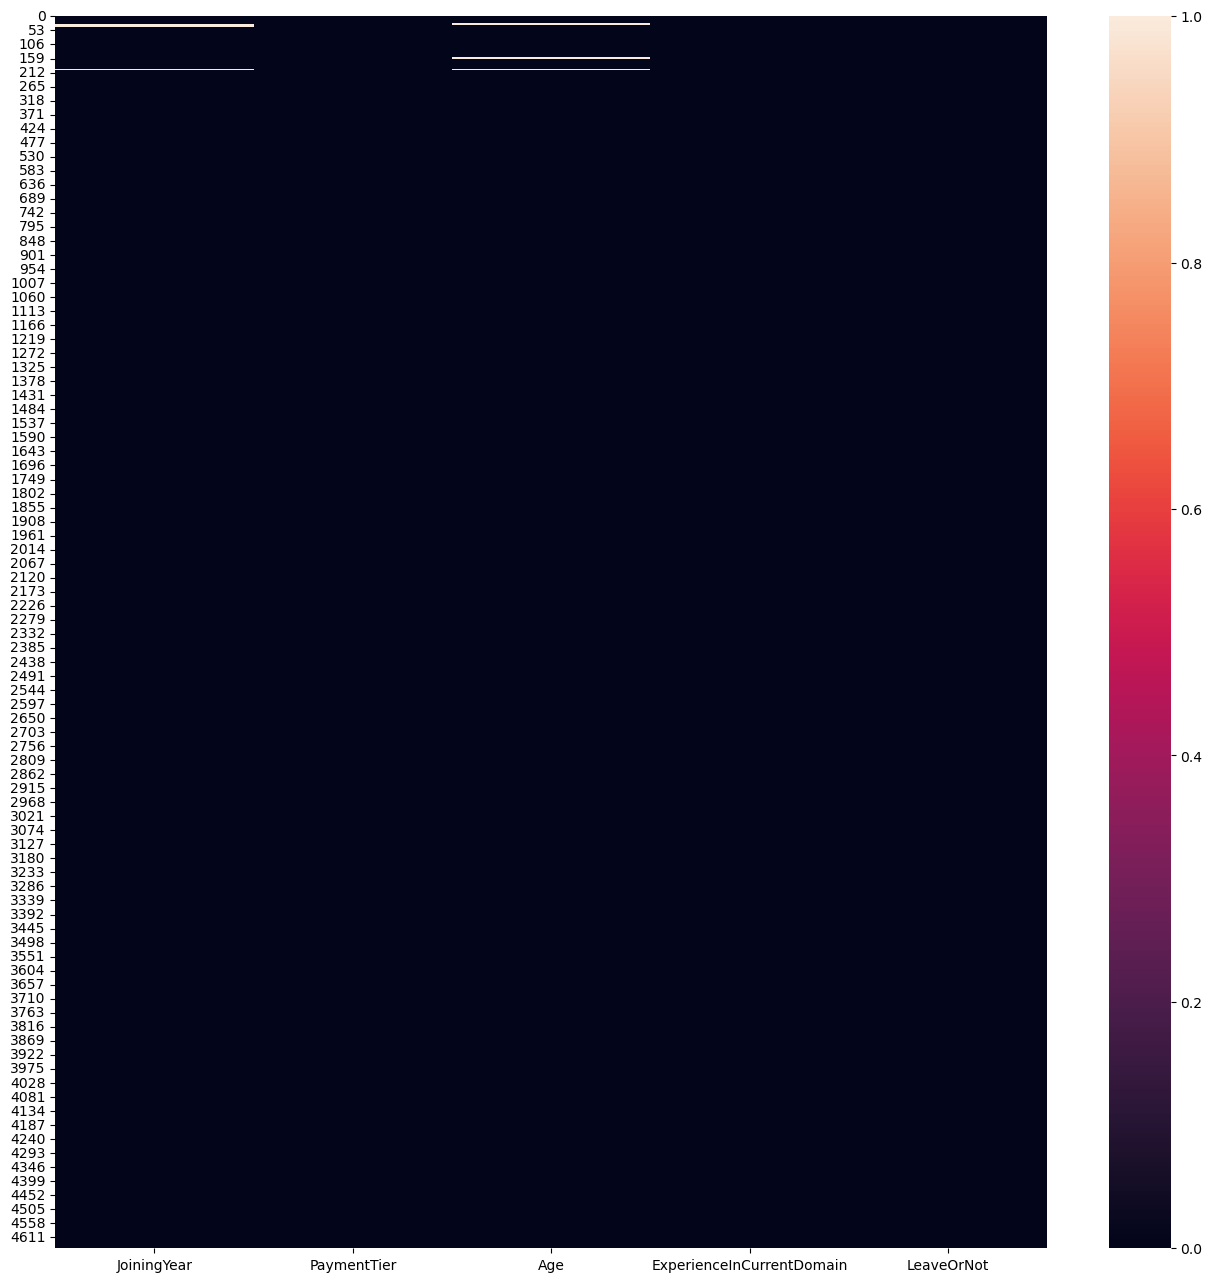

In [15]:
plt.figure(figsize=(16,16))
sns.heatmap(df1.isnull())


In [16]:
# fill the missing values in age column with the mean of age
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [17]:
# fill the missing values in year column with the median of year
df['JoiningYear'] = df['JoiningYear'].fillna(df['JoiningYear'].median())

In [18]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017.0,Bangalore,3,34.0,Male,No,0,0
1,Bachelors,2013.0,Pune,1,28.0,Female,No,3,1
2,Bachelors,2014.0,New Delhi,3,38.0,Female,No,2,0
3,Masters,2016.0,Bangalore,3,27.0,Male,No,5,1
4,Masters,2017.0,Pune,3,24.0,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013.0,Bangalore,3,26.0,Female,No,4,0
4649,Masters,2013.0,Pune,2,37.0,Male,No,2,1
4650,Masters,2018.0,New Delhi,3,27.0,Male,No,5,1
4651,Bachelors,2012.0,Bangalore,3,30.0,Male,Yes,2,0


In [19]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       7
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [20]:
cat_vars = df.select_dtypes(include='object')
cat_vars.head()

,Education,City,Gender,EverBenched
0,Bachelors,Bangalore,Male,No
1,Bachelors,Pune,Female,No
2,Bachelors,New Delhi,Female,No
3,Masters,Bangalore,Male,No
4,Masters,Pune,Male,Yes


In [21]:
cat_vars.isnull().sum()

Education      0
City           0
Gender         7
EverBenched    0
dtype: int64

In [22]:
 cat_vars.isnull().mean()*100


Education      0.000000
City           0.000000
Gender         0.150441
EverBenched    0.000000
dtype: float64

# Applying Mode

In [23]:
#fill Gender Values with mode
cat_vars['Gender'].value_counts()

Gender
Male      2774
Female    1872
Name: count, dtype: int64

In [24]:
cat_vars['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [25]:
cat_vars['Gender'].fillna(cat_vars['Gender'].mode()[0])

0         Male
1       Female
2       Female
3         Male
4         Male
         ...  
4648    Female
4649      Male
4650      Male
4651      Male
4652      Male
Name: Gender, Length: 4653, dtype: object

In [26]:
cat_vars['Gender'].fillna(cat_vars['Gender'].mode()[0]).value_counts()

Gender
Male      2781
Female    1872
Name: count, dtype: int64

In [27]:
cat_vars_copy= cat_vars.copy()

for var in cat_vars:
    cat_vars_copy[var].fillna(cat_vars[var].mode()[0],inplace=True)
    print(var,"=",cat_vars[var].mode()[0])

Education = Bachelors
City = Bangalore
Gender = Male
EverBenched = No


In [28]:
cat_vars_copy.isnull().sum().sum()

0

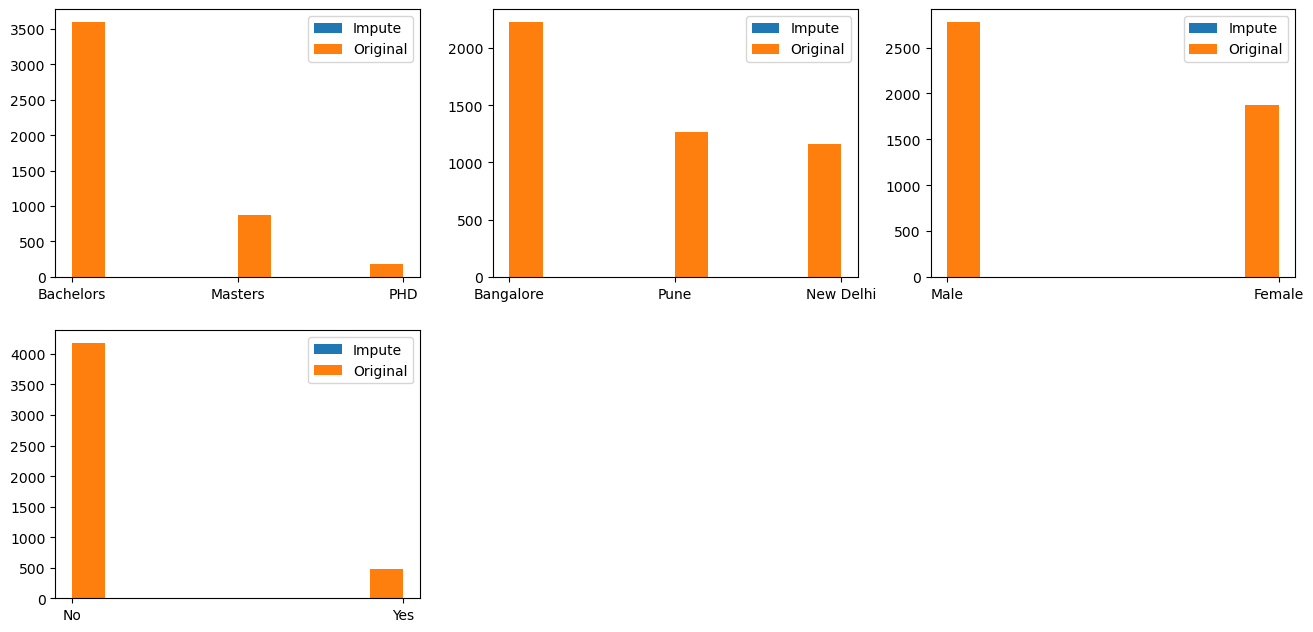

In [29]:
plt.figure(figsize=(16,16))
for i,var in enumerate(cat_vars):
    plt.subplot(4,3,i+1)
    plt.hist(cat_vars_copy[var],label="Impute")
    plt.hist(cat_vars[var].dropna(),label="Original")
    plt.legend()

In [30]:
df.update(cat_vars_copy)


In [31]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017.0,Bangalore,3,34.0,Male,No,0,0
1,Bachelors,2013.0,Pune,1,28.0,Female,No,3,1
2,Bachelors,2014.0,New Delhi,3,38.0,Female,No,2,0
3,Masters,2016.0,Bangalore,3,27.0,Male,No,5,1
4,Masters,2017.0,Pune,3,24.0,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013.0,Bangalore,3,26.0,Female,No,4,0
4649,Masters,2013.0,Pune,2,37.0,Male,No,2,1
4650,Masters,2018.0,New Delhi,3,27.0,Male,No,5,1
4651,Bachelors,2012.0,Bangalore,3,30.0,Male,Yes,2,0


In [32]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  4653 non-null   object 
 1   JoiningYear                4653 non-null   float64
 2   City                       4653 non-null   object 
 3   PaymentTier                4653 non-null   int64  
 4   Age                        4653 non-null   float64
 5   Gender                     4653 non-null   object 
 6   EverBenched                4653 non-null   object 
 7   ExperienceInCurrentDomain  4653 non-null   int64  
 8   LeaveOrNot                 4653 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 327.3+ KB


<Axes: >

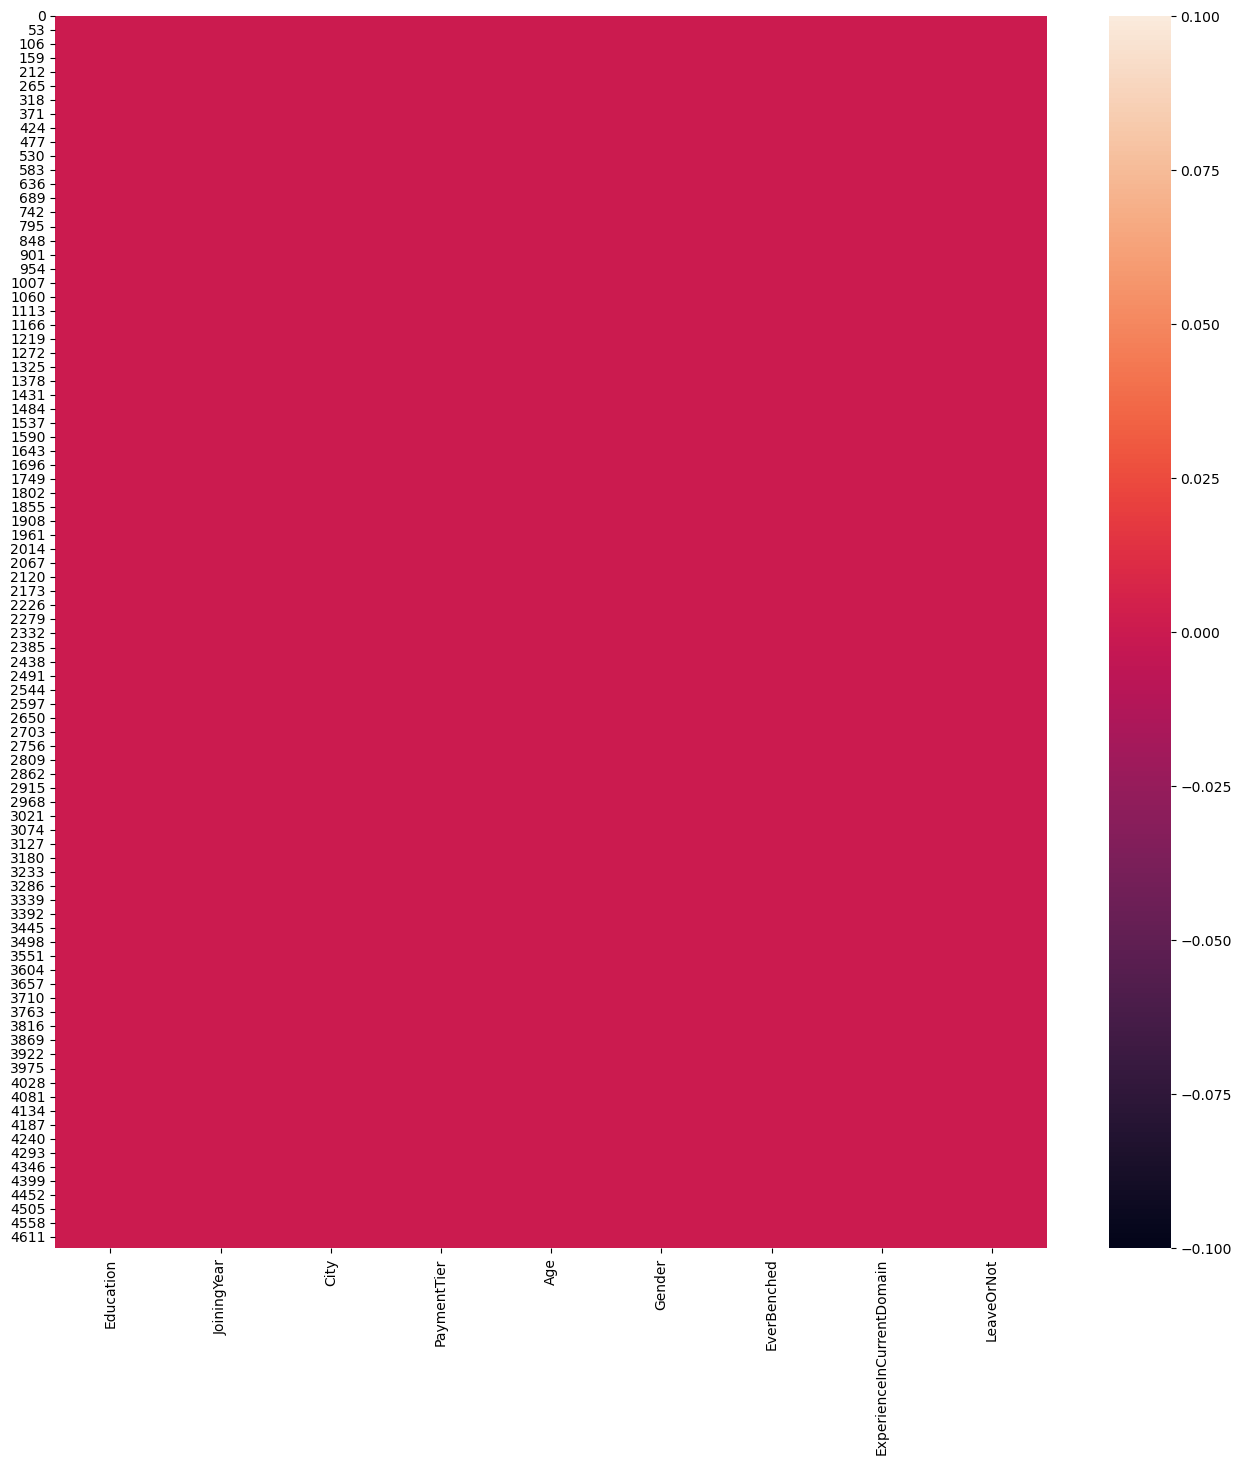

In [34]:
plt.figure(figsize=(16,16))
sns.heatmap(df.isnull())


# Using One Hot Enconding

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
df = pd.read_csv(r"Employee.csv")
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017.0,Bangalore,3,34.0,Male,No,0,0
1,Bachelors,2013.0,Pune,1,28.0,Female,No,3,1
2,Bachelors,2014.0,New Delhi,3,38.0,Female,No,2,0
3,Masters,2016.0,Bangalore,3,27.0,Male,No,5,1
4,Masters,2017.0,Pune,3,24.0,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013.0,Bangalore,3,26.0,Female,No,4,0
4649,Masters,2013.0,Pune,2,37.0,Male,No,2,1
4650,Masters,2018.0,New Delhi,3,27.0,Male,No,5,1
4651,Bachelors,2012.0,Bangalore,3,30.0,Male,Yes,2,0


In [37]:
df['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [38]:
oh_enc = OneHotEncoder(sparse=False,)

In [39]:
oh_enc_arr = oh_enc.fit_transform(df[['Education',]])

oh_enc_arr

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [40]:
oh_enc=OneHotEncoder(sparse=False,drop='first')

In [41]:
oh_enc_arr=oh_enc.fit_transform(df[["Education"]])
oh_enc_arr

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [1., 0.],
       [0., 0.],
       [0., 0.]])

In [42]:
marged= pd.DataFrame(oh_enc_arr, columns=["Bachelors","Masters"])
marged

,Bachelors,Masters
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
4648,0.0,0.0
4649,1.0,0.0
4650,1.0,0.0
4651,0.0,0.0


In [43]:
df["Education"] = marged[["Bachelors"]].copy()

df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0.0,2017.0,Bangalore,3,34.0,Male,No,0,0
1,0.0,2013.0,Pune,1,28.0,Female,No,3,1
2,0.0,2014.0,New Delhi,3,38.0,Female,No,2,0
3,1.0,2016.0,Bangalore,3,27.0,Male,No,5,1
4,1.0,2017.0,Pune,3,24.0,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,0.0,2013.0,Bangalore,3,26.0,Female,No,4,0
4649,1.0,2013.0,Pune,2,37.0,Male,No,2,1
4650,1.0,2018.0,New Delhi,3,27.0,Male,No,5,1
4651,0.0,2012.0,Bangalore,3,30.0,Male,Yes,2,0


In [44]:
df.update(df)
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0.0,2017.0,Bangalore,3,34.0,Male,No,0,0
1,0.0,2013.0,Pune,1,28.0,Female,No,3,1
2,0.0,2014.0,New Delhi,3,38.0,Female,No,2,0
3,1.0,2016.0,Bangalore,3,27.0,Male,No,5,1
4,1.0,2017.0,Pune,3,24.0,Male,Yes,2,1


In [45]:
oh_enc = OneHotEncoder(sparse=False,)

In [46]:
oh_enc_arr = oh_enc.fit_transform(df[["City"]])

oh_enc_arr

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [47]:
marged= pd.DataFrame(oh_enc_arr, columns=["Bangalore","Pune","New Delhi"])
marged

,Bangalore,Pune,New Delhi
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
4648,1.0,0.0,0.0
4649,0.0,0.0,1.0
4650,0.0,1.0,0.0
4651,1.0,0.0,0.0


In [48]:
df["City"] = marged[["Bangalore"]].copy()

df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0.0,2017.0,1.0,3,34.0,Male,No,0,0
1,0.0,2013.0,0.0,1,28.0,Female,No,3,1
2,0.0,2014.0,0.0,3,38.0,Female,No,2,0
3,1.0,2016.0,1.0,3,27.0,Male,No,5,1
4,1.0,2017.0,0.0,3,24.0,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,0.0,2013.0,1.0,3,26.0,Female,No,4,0
4649,1.0,2013.0,0.0,2,37.0,Male,No,2,1
4650,1.0,2018.0,0.0,3,27.0,Male,No,5,1
4651,0.0,2012.0,1.0,3,30.0,Male,Yes,2,0


In [49]:
df.update(df)
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0.0,2017.0,1.0,3,34.0,Male,No,0,0
1,0.0,2013.0,0.0,1,28.0,Female,No,3,1
2,0.0,2014.0,0.0,3,38.0,Female,No,2,0
3,1.0,2016.0,1.0,3,27.0,Male,No,5,1
4,1.0,2017.0,0.0,3,24.0,Male,Yes,2,1


In [50]:
oh_enc = OneHotEncoder(sparse=False,)

In [51]:
oh_enc_arr = oh_enc.fit_transform(df[["Gender"]])

oh_enc_arr

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [52]:
oh_enc=OneHotEncoder(sparse=False,drop='first')

In [53]:
oh_enc_arr=oh_enc.fit_transform(df[["Gender"]])
oh_enc_arr

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [54]:
marged= pd.DataFrame(oh_enc_arr, columns=["Male","Female"])
marged

,Male,Female
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
4648,0.0,0.0
4649,1.0,0.0
4650,1.0,0.0
4651,1.0,0.0


In [55]:
df["Gender"] = marged[["Male"]].copy()

df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0.0,2017.0,1.0,3,34.0,1.0,No,0,0
1,0.0,2013.0,0.0,1,28.0,0.0,No,3,1
2,0.0,2014.0,0.0,3,38.0,0.0,No,2,0
3,1.0,2016.0,1.0,3,27.0,1.0,No,5,1
4,1.0,2017.0,0.0,3,24.0,1.0,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,0.0,2013.0,1.0,3,26.0,0.0,No,4,0
4649,1.0,2013.0,0.0,2,37.0,1.0,No,2,1
4650,1.0,2018.0,0.0,3,27.0,1.0,No,5,1
4651,0.0,2012.0,1.0,3,30.0,1.0,Yes,2,0


In [56]:
df.update(df)
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0.0,2017.0,1.0,3,34.0,1.0,No,0,0
1,0.0,2013.0,0.0,1,28.0,0.0,No,3,1
2,0.0,2014.0,0.0,3,38.0,0.0,No,2,0
3,1.0,2016.0,1.0,3,27.0,1.0,No,5,1
4,1.0,2017.0,0.0,3,24.0,1.0,Yes,2,1


In [57]:
oh_enc = OneHotEncoder(sparse=False,)

In [58]:
oh_enc_arr = oh_enc.fit_transform(df[["EverBenched"]])

oh_enc_arr

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [59]:
marged= pd.DataFrame(oh_enc_arr, columns=["No","Yes"])
marged

,No,Yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
4648,1.0,0.0
4649,1.0,0.0
4650,1.0,0.0
4651,0.0,1.0


In [60]:
df["EverBenched"] = marged[["Yes"]].copy()

df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0.0,2017.0,1.0,3,34.0,1.0,0.0,0,0
1,0.0,2013.0,0.0,1,28.0,0.0,0.0,3,1
2,0.0,2014.0,0.0,3,38.0,0.0,0.0,2,0
3,1.0,2016.0,1.0,3,27.0,1.0,0.0,5,1
4,1.0,2017.0,0.0,3,24.0,1.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...
4648,0.0,2013.0,1.0,3,26.0,0.0,0.0,4,0
4649,1.0,2013.0,0.0,2,37.0,1.0,0.0,2,1
4650,1.0,2018.0,0.0,3,27.0,1.0,0.0,5,1
4651,0.0,2012.0,1.0,3,30.0,1.0,1.0,2,0


In [61]:
df.update(df)
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0.0,2017.0,1.0,3,34.0,1.0,0.0,0,0
1,0.0,2013.0,0.0,1,28.0,0.0,0.0,3,1
2,0.0,2014.0,0.0,3,38.0,0.0,0.0,2,0
3,1.0,2016.0,1.0,3,27.0,1.0,0.0,5,1
4,1.0,2017.0,0.0,3,24.0,1.0,1.0,2,1


# Features scaling

In [62]:
x=df.drop('LeaveOrNot',axis=1)

y=df["LeaveOrNot"]

print('Shape of x=',x.shape)
print('Shape of y=',y.shape)

Shape of x= (4653, 8)
Shape of y= (4653,)


In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#test_size=0.2 it means we use 20% of dataset for test
print('Shape of x_train=',x_train.shape)
print('Shape of y_train=',y_train.shape)
print('Shape of x_test=',x_test.shape)
print('Shape of y_test=',y_test.shape)

Shape of x_train= (3722, 8)
Shape of y_train= (3722,)
Shape of x_test= (931, 8)
Shape of y_test= (931,)


In [64]:
sc=StandardScaler()
sc.fit(x_train)

StandardScaler()

In [65]:
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)

In [66]:
sc.mean_

array([1.89682966e-01, 2.01507037e+03, 4.78506179e-01, 2.69451908e+00,
       2.94457636e+01, 5.99677593e-01, 1.00214938e-01, 2.90435250e+00])

In [67]:
sc.scale_

array([0.39205017, 1.86571525, 0.4995378 , 0.56630921, 4.84669449,
       0.48996365, 0.30028637, 1.56017999])

In [68]:
df.describe()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4636.000000,4653.000000,4653.000000,4633.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,0.187621,2015.062338,0.478831,2.698259,29.405353,0.596175,0.102729,2.905652,0.343864
std,0.390451,1.863693,0.499605,0.561435,4.828017,0.490716,0.303638,1.558240,0.475047
min,0.000000,2012.000000,0.000000,1.000000,22.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2013.000000,0.000000,3.000000,26.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,2015.000000,0.000000,3.000000,28.000000,1.000000,0.000000,3.000000,0.000000
75%,0.000000,2017.000000,1.000000,3.000000,32.000000,1.000000,0.000000,4.000000,1.000000
max,1.000000,2018.000000,1.000000,3.000000,41.000000,1.000000,1.000000,7.000000,1.000000


In [69]:
 min_max_scaler = MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)

In [70]:
x_train_minmax

array([[1.        , 0.16666667, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 1.        , 0.        ,
        0.42857143],
       [1.        , 0.83333333, 0.        , ..., 1.        , 0.        ,
        0.28571429],
       ...,
       [0.        , 0.66666667, 1.        , ..., 0.        , 0.        ,
        0.14285714],
       [0.        , 0.5       , 1.        , ..., 1.        , 0.        ,
        0.14285714],
       [0.        , 0.5       , 1.        , ..., 1.        , 0.        ,
        0.71428571]])

In [71]:
x_test_minmax = min_max_scaler.transform(x_test)
x_test_minmax

array([[0.        , 0.66666667, 1.        , ..., 0.        , 0.        ,
        0.28571429],
       [0.        , 0.16666667, 1.        , ..., 0.        , 0.        ,
        0.57142857],
       [0.        , 0.83333333, 0.        , ..., 0.        , 0.        ,
        0.42857143],
       ...,
       [0.        , 1.        , 0.        , ..., 1.        , 1.        ,
        0.57142857],
       [0.        , 0.        , 1.        , ..., 1.        , 0.        ,
        0.57142857],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.14285714]])

In [72]:
 min_max_scaler.scale_

array([1.        , 0.16666667, 1.        , 0.5       , 0.05263158,
       1.        , 1.        , 0.14285714])

In [73]:
min_max_scaler.min_

array([   0.        , -335.33333333,    0.        ,   -0.5       ,
         -1.15789474,    0.        ,    0.        ,    0.        ])

In [74]:
sc=StandardScaler()
sc.fit(x_train)

StandardScaler()

In [75]:
sc.mean_

array([1.89682966e-01, 2.01507037e+03, 4.78506179e-01, 2.69451908e+00,
       2.94457636e+01, 5.99677593e-01, 1.00214938e-01, 2.90435250e+00])

In [76]:
sc.scale_

array([0.39205017, 1.86571525, 0.4995378 , 0.56630921, 4.84669449,
       0.48996365, 0.30028637, 1.56017999])

In [77]:
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)

In [78]:
x_train_sc

array([[ 2.06687074, -1.10969205, -0.95789784, ...,  0.81704512,
        -0.33373122, -1.86154964],
       [-0.48382319, -1.64567952,  1.04395267, ...,  0.81704512,
        -0.33373122,  0.06130543],
       [ 2.06687074,  1.03425784, -0.95789784, ...,  0.81704512,
        -0.33373122, -0.57964626],
       ...,
       [-0.48382319,  0.49827037,  1.04395267, ..., -1.22392262,
        -0.33373122, -1.22059795],
       [-0.48382319, -0.0377171 ,  1.04395267, ...,  0.81704512,
        -0.33373122, -1.22059795],
       [-0.48382319, -0.0377171 ,  1.04395267, ...,  0.81704512,
        -0.33373122,  1.34320881]])

# Split data

In [79]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0.0,2017.0,1.0,3,34.0,1.0,0.0,0,0
1,0.0,2013.0,0.0,1,28.0,0.0,0.0,3,1
2,0.0,2014.0,0.0,3,38.0,0.0,0.0,2,0
3,1.0,2016.0,1.0,3,27.0,1.0,0.0,5,1
4,1.0,2017.0,0.0,3,24.0,1.0,1.0,2,1


In [80]:
df.keys()

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

# Data explortion

Text(0.5, 1.0, 'Employee Turnover by Education')

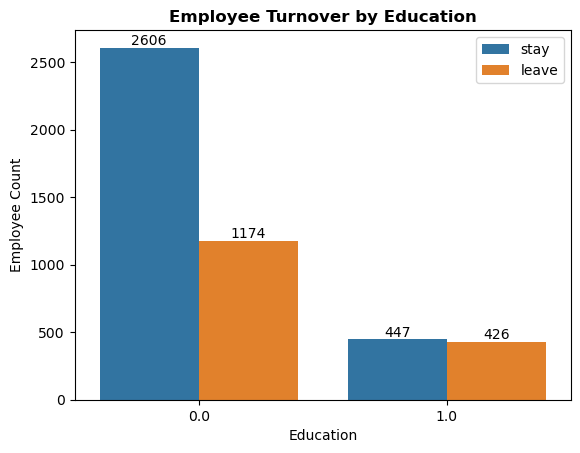

In [81]:
countplot = sns.countplot(x = "Education", hue = "LeaveOrNot", data =df)
for count in countplot.containers:
    countplot.bar_label(count,)
plt.xlabel("Education")
plt.legend(labels=["Bachelors","Masters","PHD"])
plt.ylabel("Employee Count")
plt.legend(labels = ["stay", "leave"])
plt.title("Employee Turnover by Education", fontweight = "bold")

Text(0.5, 1.0, 'Employee Turnover by Joining Year')

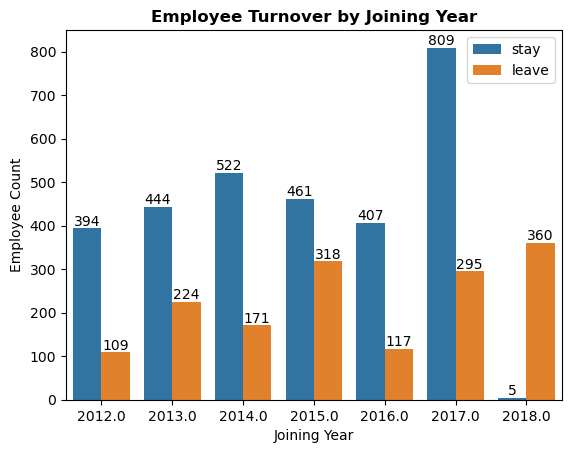

In [82]:
countplot = sns.countplot(x = "JoiningYear", hue = "LeaveOrNot", data = df)
for count in countplot.containers:
    countplot.bar_label(count,)
plt.xlabel("Joining Year")
plt.ylabel("Employee Count")
plt.legend(labels = ["stay", "leave"])
plt.title("Employee Turnover by Joining Year", fontweight = "bold")

<function matplotlib.pyplot.show(close=None, block=None)>

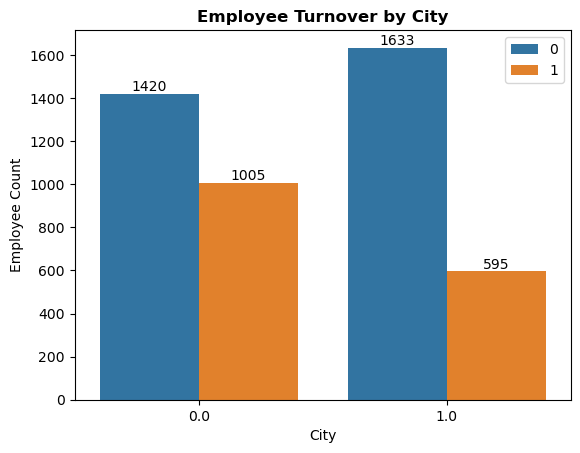

In [83]:
countplot = sns.countplot(x = "City", hue = "LeaveOrNot", data = df)
for count in countplot.containers:
    countplot.bar_label(count,)
plt.xlabel("City")
plt.ylabel("Employee Count")
plt.legend(labels = ["stay", "leave"])
plt.title("Employee Turnover by City",fontweight = "bold" )
plt.legend()
plt.show

Text(0.5, 1.0, 'Employee Turnover by Payment Tier')

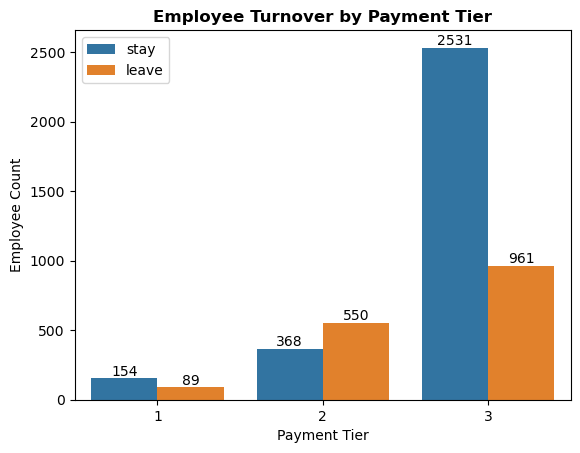

In [84]:
countplot = sns.countplot(x = "PaymentTier", hue = "LeaveOrNot", data = df)
for count in countplot.containers:
    countplot.bar_label(count,)
plt.xlabel("Payment Tier")
plt.ylabel("Employee Count")
plt.legend(labels = ["stay", "leave"])
plt.title("Employee Turnover by Payment Tier", fontweight = "bold")

Text(0.5, 1.0, 'Employee Turnover by Age')

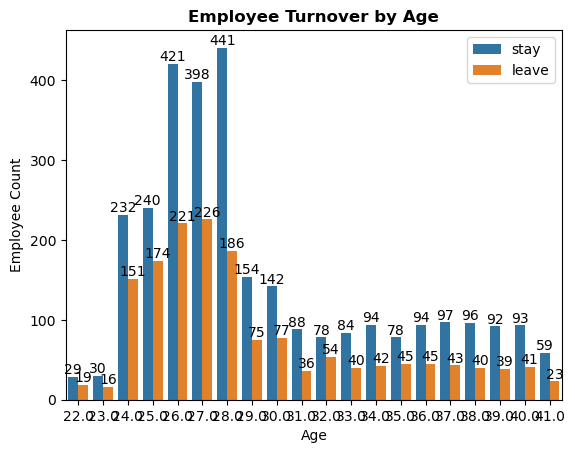

In [85]:
countplot = sns.countplot(x = "Age", hue = "LeaveOrNot", data = df)
for count in countplot.containers:
    countplot.bar_label(count,)
plt.xlabel("Age")
plt.ylabel("Employee Count")
plt.legend(labels = ["stay", "leave"])
plt.title("Employee Turnover by Age", fontweight = "bold")

Text(0.5, 1.0, 'Employee Turnover by Gender')

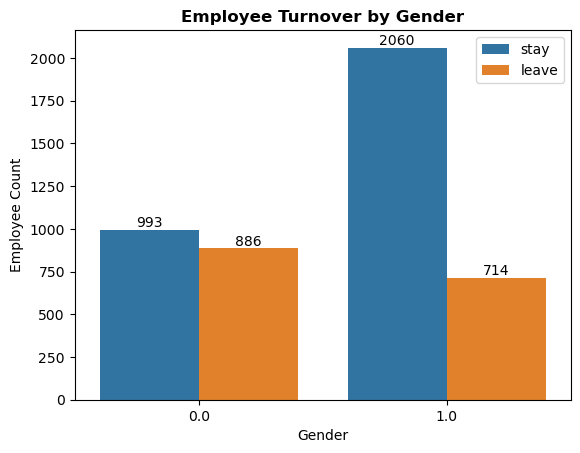

In [86]:
countplot = sns.countplot(x = "Gender", hue = "LeaveOrNot", data = df)
for count in countplot.containers:
    countplot.bar_label(count,)
plt.xlabel("Gender")
plt.ylabel("Employee Count")
plt.legend(labels = ["stay", "leave"])
plt.title("Employee Turnover by Gender", fontweight = "bold")

Text(0.5, 1.0, 'Employee Turnover by Ever Benched')

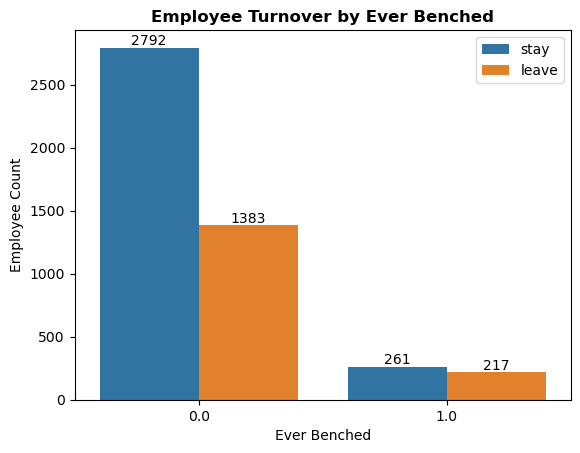

In [87]:
countplot = sns.countplot(x = "EverBenched", hue = "LeaveOrNot", data = df)
for count in countplot.containers:
    countplot.bar_label(count,)
plt.xlabel("Ever Benched")
plt.ylabel("Employee Count")
plt.legend(labels = ["stay", "leave"])
plt.title("Employee Turnover by Ever Benched", fontweight = "bold")

Text(0.5, 1.0, 'Employee Turnover by Experience Years')

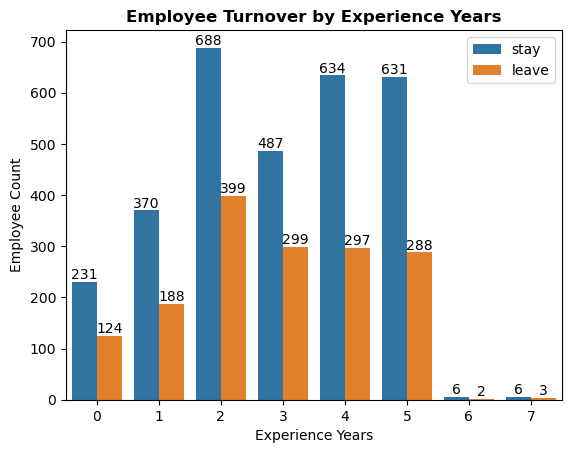

In [88]:
countplot = sns.countplot(x = "ExperienceInCurrentDomain", hue = "LeaveOrNot", data= df)
for count in countplot.containers:
    countplot.bar_label(count,)
plt.xlabel("Experience Years")
plt.ylabel("Employee Count")
plt.legend(labels = ["stay", "leave"])
plt.title("Employee Turnover by Experience Years", fontweight = "bold")

In [89]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [90]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=2020)
print('Shape of X_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (3722, 8)
Shape of y_train =  (3722,)
Shape of X_test =  (931, 8)
Shape of y_test =  (931,)


# Data modeling

In [91]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#test_size=0.2 it means we use 20% of dataset for test
print('Shape of x_train=',x_train.shape)
print('Shape of y_train=',y_train.shape)
print('Shape of x_test=',x_test.shape)
print('Shape of y_test=',y_test.shape)

Shape of x_train= (3722, 8)
Shape of y_train= (3722,)
Shape of x_test= (931, 8)
Shape of y_test= (931,)


In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
classifier=DecisionTreeClassifier(criterion='gini')
#mse=mean square error
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [95]:
classifier.predict(x_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [96]:
classifier.score(x_test,y_test)

0.8345864661654135

In [97]:
x_test.iloc[:,-1]

297     2
2705    4
501     3
1272    2
3956    1
       ..
3103    5
733     3
1419    4
3291    4
2178    1
Name: ExperienceInCurrentDomain, Length: 931, dtype: int64

In [98]:
classifier.predict([x_test.iloc[-1,:]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [99]:
y_test.iloc[-1]

0

In [100]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [101]:
y_test

297     1
2705    0
501     1
1272    0
3956    0
       ..
3103    0
733     1
1419    1
3291    0
2178    0
Name: LeaveOrNot, Length: 931, dtype: int64

Apply Confusion Matrix

In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

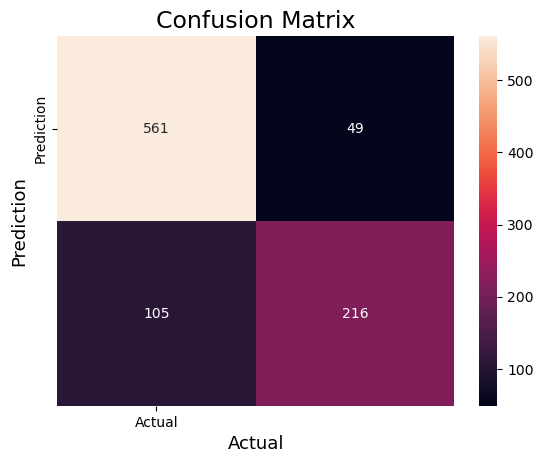

In [103]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Actual'],
            yticklabels=['Prediction'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()